In [1]:
import cf
import cfplot as cfp
import matplotlib.pyplot as plt

In [2]:
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
obs=cf.read(obsdata,select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [4]:
obs_zm=obs.collapse('X: mean')

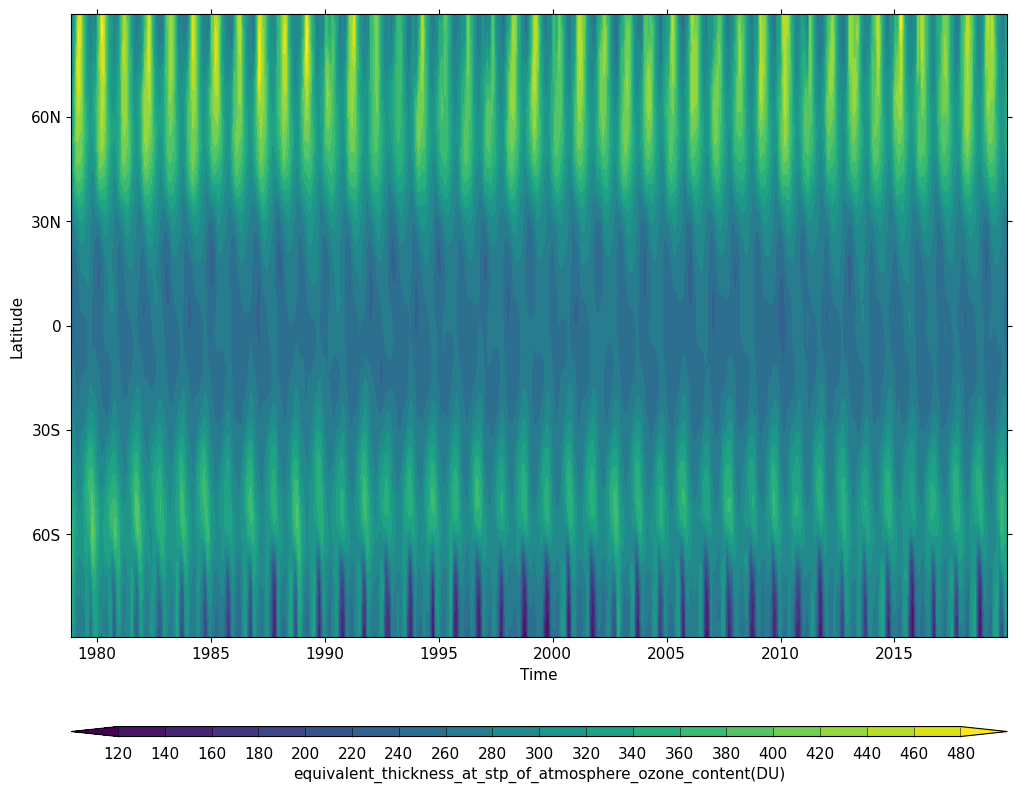

In [5]:
cfp.levs(min=120, max=480, step=20)
cfp.con(obs_zm, lines=False, swap_axes=True)

In [6]:
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'

In [7]:
ukca=cf.read(ukcadata,select='stash_code=50219')[0]

In [8]:
ukca_zm=ukca.collapse('X: mean')

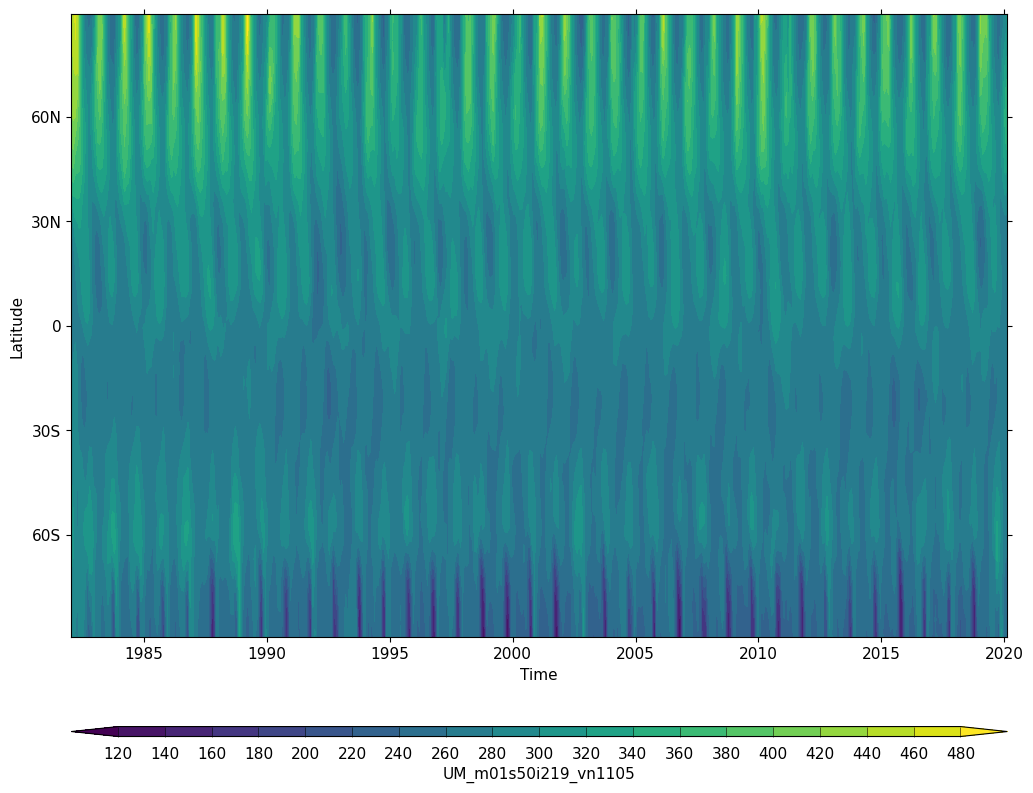

In [9]:
cfp.levs(min=120, max=480, step=20)
cfp.con(ukca_zm, lines=False, swap_axes=True)

In [10]:
# normalise time units to allow for plotting on the same graph
obs_zm.coordinate('T').set_property('units','hours since 1970-01-01')
ukca_zm.coordinate('T').set_property('units','hours since 1970-01-01')

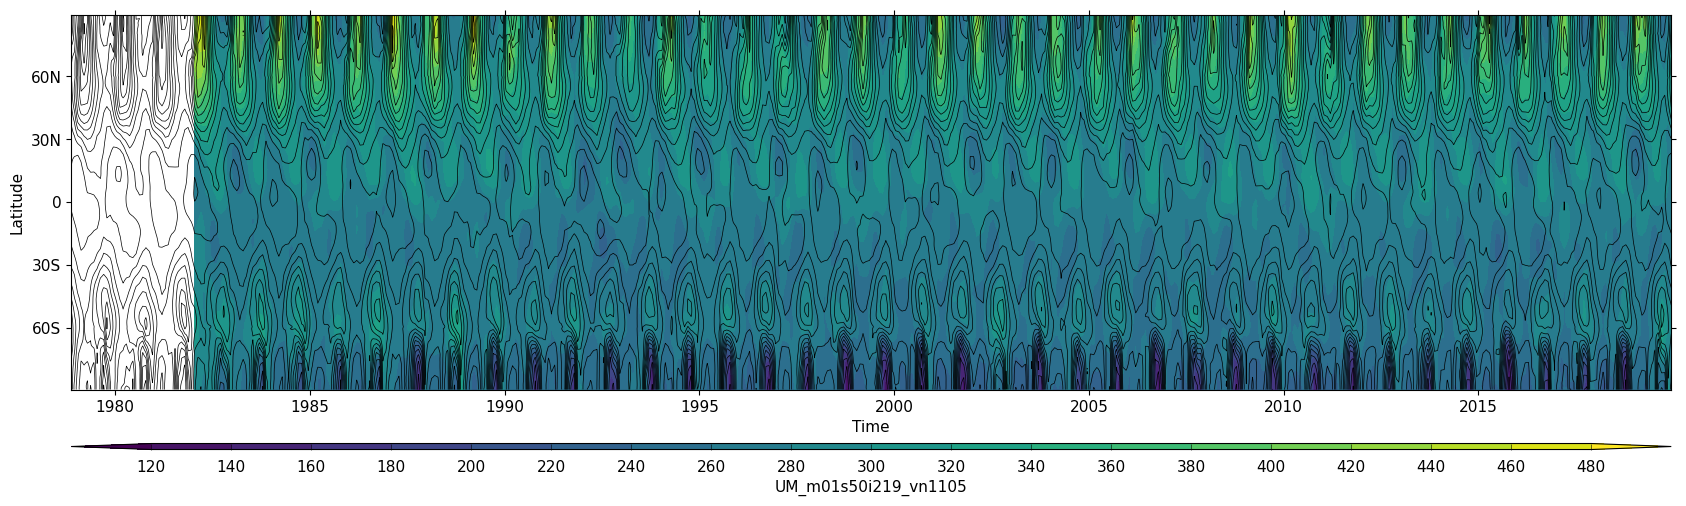

In [11]:
# quite a lot of data so stretch the plot
cfp.gopen(figsize=(20,5))
cfp.levs(min=120, max=480, step=20)
cfp.con(ukca_zm, lines=False, fill=True, swap_axes=True)
cfp.con(obs_zm, fill=False, lines=True, linewidths=0.5, line_labels=False, swap_axes=True)
cfp.gclose()